In [21]:
%matplotlib inline

##  Visualizing Top Features for Linear SVM with Yellowbrick

Redoing example in this [blog](https://medium.com/@aneesha/visualising-top-features-in-linear-svm-with-scikit-learn-and-matplotlib-3454ab18a14d#.kcf2difm5) with Yellowbrick.

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt
import os
import sys 
import numpy as np

# Modify the path 
sys.path.append("..")

from yellowbrick.classifier.top_features import TopFeaturesVisualizer
import matplotlib.pyplot as plt 

In [23]:
from download import download_all 
from sklearn.datasets.base import Bunch

## The path to the test data sets
FIXTURES  = os.path.join(os.getcwd(), "data")

## Dataset loading mechanisms
datasets = {
    "hobbies": os.path.join(FIXTURES, "hobbies")
}


def load_data(name, download=True):
    """
    Loads and wrangles the passed in text corpus by name.
    If download is specified, this method will download any missing files. 
    """
    
    # Get the path from the datasets 
    path = datasets[name]
    
    # Check if the data exists, otherwise download or raise 
    if not os.path.exists(path):
        if download:
            download_all() 
        else:
            raise ValueError((
                "'{}' dataset has not been downloaded, "
                "use the download.py module to fetch datasets"
            ).format(name))
    
    # Read the directories in the directory as the categories. 
    categories = [
        cat for cat in os.listdir(path) 
        if os.path.isdir(os.path.join(path, cat))
    ]
    
    
    files  = [] # holds the file names relative to the root 
    data   = [] # holds the text read from the file 
    target = [] # holds the string of the category 
        
    # Load the data from the files in the corpus 
    for cat in categories:
        for name in os.listdir(os.path.join(path, cat)):
            files.append(os.path.join(path, cat, name))
            target.append(cat)
            
            with open(os.path.join(path, cat, name), 'r') as f:
                data.append(f.read())
        
    
    # Return the data bunch for use similar to the newsgroups example
    return Bunch(
        categories=categories,
        files=files,
        data=data,
        target=target,
    )

### Yellowbrick Top Features Visualizer Demo

In [31]:
corpus = load_data('hobbies')
data = corpus.data
target = corpus.target
vectorizer = CountVectorizer(stop_words='english')
vectorizer.fit(data)
X_train = vectorizer.transform(data)
svm = LinearSVC()
features = vectorizer.get_feature_names()

#### Visualize top 10 features for one class (sports)

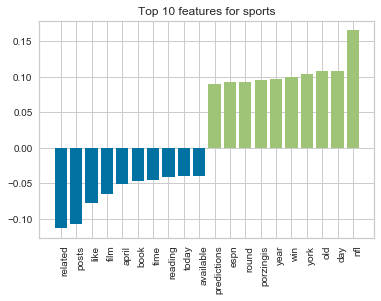

In [26]:
visualizer = TopFeaturesVisualizer(svm, N=10, features=features)
visualizer.fit(X_train, target)
visualizer.score(class_label='sports')
visualizer.poof()

#### Visualize top 10 features for all classes

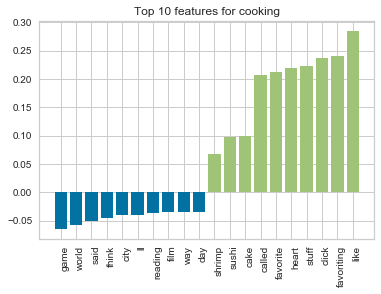

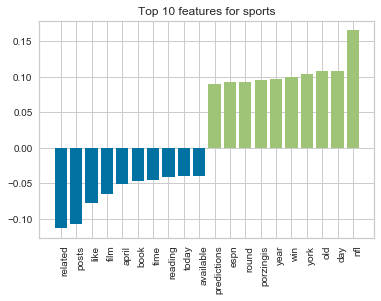

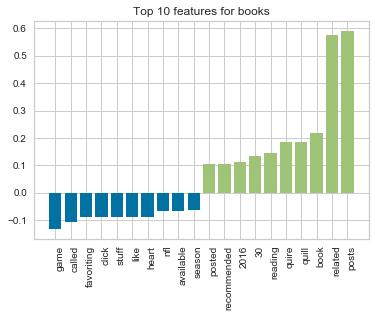

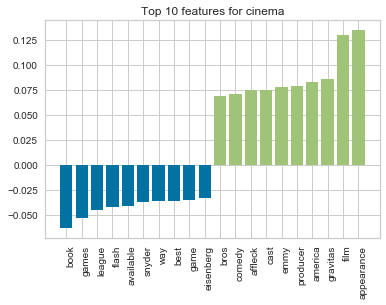

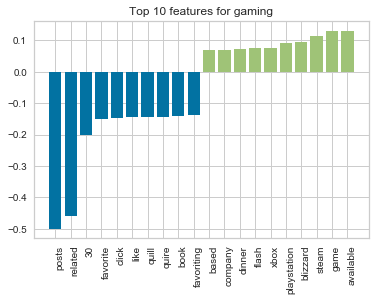

In [44]:
classes = list(set(corpus.target))

for label in classes:
    visualizer = TopFeaturesVisualizer(svm, N=10, features=features)
    visualizer.fit(X_train, target)
    visualizer.score(class_label=label)
    visualizer.poof()